# Titanic Disaster

Bu tekrar bölümünde, farklı özelliklere sahip tüm yolcuları listeleyen ünlü  [Titanic](https://drive.google.com/file/d/1td-RTqXsV0Cc3z6Ad3Vk-15bH42L40aY/view) veri setini inceleyeceğiz.

❓`matplotlib`, `numpy` ve `pandas` kütüphanelerini her zamanki şekilde yükleyerek başla.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import os

print("📂 Notebook'un çalıştığı yer:")
print(os.getcwd())

print("\n📄 Bu klasördeki dosyalar:")
for dosya in os.listdir():
    if "csv" in dosya or "Titanic" in dosya:
        print("-->", dosya)

📂 Notebook'un çalıştığı yer:
/Users/macos/data-titanic_disaster-

📄 Bu klasördeki dosyalar:


❓CSV verisini yükleyip `titanic_df` adlı bir değişkene ata.

CSV dosyasına şu URL’den ulaşılabilir: https://drive.google.com/file/d/1td-RTqXsV0Cc3z6Ad3Vk-15bH42L40aY/view

<details>
    <summary>💡 <strong>Hint</strong> - Click to reveal</summary>
    Try using <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html"><code>pandas.DataFrame.read_csv</code></a>
</details>

In [9]:
# Masaüstündeki dosyayı doğrudan okuyoruz
path = "/Users/macos/Desktop/titanic.csv"
titanic_df = pd.read_csv(path)

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


❓ Veri setini her zamanki yöntemlerle incele (`shape`, `dtypes`, `describe()`, `info()`, `isnull().sum()`).

 `B` tuşuna basarak yeni hücreler eklemekten çekinme.

In [10]:
# Boyut bilgisi (Satır, Sütun)
print("Shape:", titanic_df.shape)

# Veri tipleri (Hangi sütun sayı, hangisi yazı?)
print("\nDtypes:\n", titanic_df.dtypes)

# İstatistiksel özet (Ortalama yaş, en pahalı bilet vs.)
print("\nDescribe:\n", titanic_df.describe())

# Genel bilgi (Boş değer var mı?)
print("\nInfo:")
titanic_df.info()

# Her sütundaki eksik veri sayısı (Burası çok önemli!)
print("\nNull Values:\n", titanic_df.isnull().sum())

Shape: (891, 12)

Dtypes:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Describe:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  8

687 satırda  `Cabin` 687 satırda  bilgisinin eksik olduğu (NaN olduğu) görülüyor.

❓`titanic_df` içerisindeki  `Cabin` sütunundan kurtulmak için [`pandas.DataFrame.drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) fonksiyonunu kullan.

In [11]:
# 'Cabin' sütununu kalıcı olarak (inplace=True) siliyoruz
titanic_df.drop('Cabin', axis=1, inplace=True)

# Silindi mi diye kontrol edelim
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

## Classes Analysis

Bilet dağılımına bir göz atalım.

❓ Bir `groupby()`,kullanarak, her sınıf (1, 2 veya 3) için satılan bilet sayısını hesaplayan bir`pclass_df` dataframe oluştur.

In [12]:
# Her sınıfta kaç bilet satılmış?
pclass_df = titanic_df.groupby('Pclass').count()['PassengerId']
# (Not: count() tüm sütunları sayar, sadece birini seçmek yeterlidir)

print(pclass_df)

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64


Sayıya bakmak çok görsel değil, veriyi bir grafikle anlamlandırmayı deneyelim.

❓ Bir önceki soruda oluşturduğun `pclass_df` dataframe’ini bir bar chart olarak plot et.

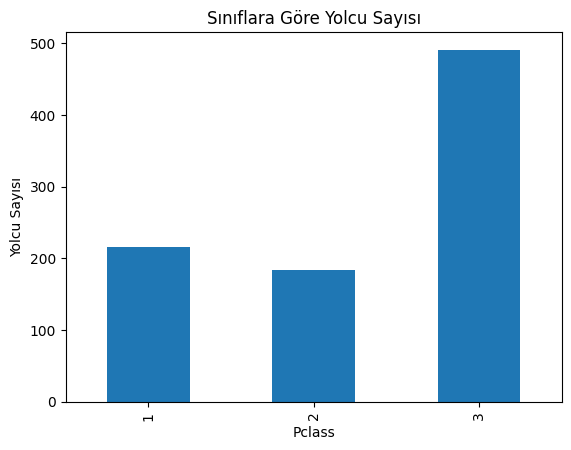

In [13]:
# Sınıf dağılımını çubuk grafik olarak çizelim
pclass_df.plot(kind='bar', title='Sınıflara Göre Yolcu Sayısı')
plt.ylabel('Yolcu Sayısı')
plt.show()

Şimdi hayatta kalanlara **survivors** bakalım.

❓ Her yolcu sınıfının hayatta kalma oranını  *survival rate* gösteren bir bar chart plot et.
`0` ,  o sınıfta kimsenin hayatta kalmadığı, `1` ise herkesin hayatta kaldığı anlamına gelir. 

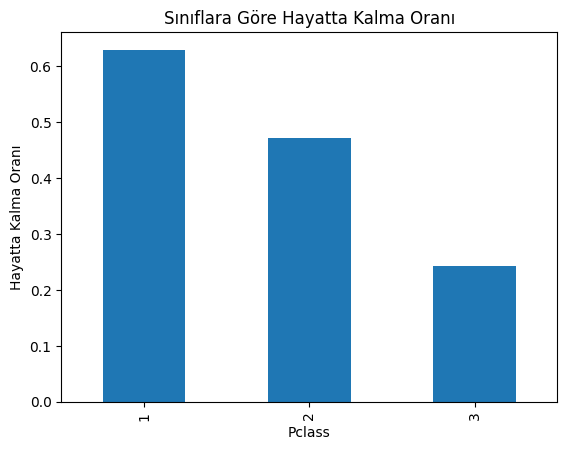

In [14]:
# Pclass'a göre gruplayıp hayatta kalma oranını (mean) buluyoruz ve çiziyoruz
titanic_df.groupby('Pclass')['Survived'].mean().plot(kind='bar', title='Sınıflara Göre Hayatta Kalma Oranı')
plt.ylabel('Hayatta Kalma Oranı')
plt.show()

### Gender Analysis

`Sex`  sütununa bir göz atalım.

❓ Bu sütunda kullanılan farklı değerleri kontrol etmek için [`pandas.Series.unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) fonksiyonunu kullan.

In [15]:
# Cinsiyet sütununda hangi değerler var? (male, female)
print(titanic_df['Sex'].unique())

['male' 'female']


❓ Her cinsiyetin hayatta kalma oranını *survival rate*  gösteren bir bar chart plot et.
Verilere göre, hangi cinsiyetin hayatta kalma ihtimali daha yüksekti?

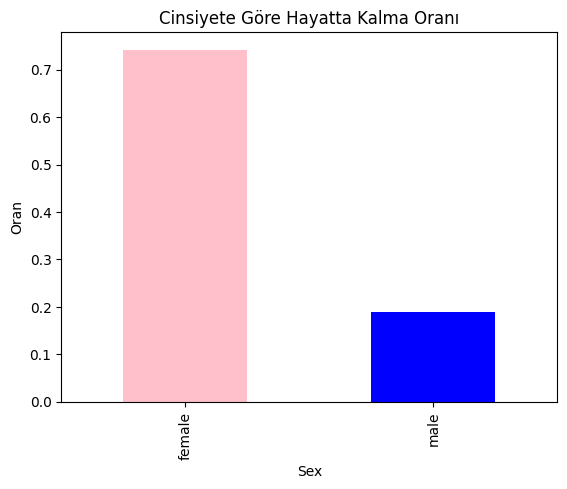

In [16]:
# Kadınların mı erkeklerin mi kurtulma oranı daha yüksek?
titanic_df.groupby('Sex')['Survived'].mean().plot(kind='bar', color=['pink', 'blue'])
plt.title('Cinsiyete Göre Hayatta Kalma Oranı')
plt.ylabel('Oran')
plt.show()

Her cinsiyet için toplam yolcu sayısını ve toplam hayatta kalan sayısını birlikte gösterdiğimiz daha şık bir histogram oluşturalım.

❓`Total` ve `Survived`  olmak üzere iki sütunlu, `male` and `female` şeklinde iki satırlı bir `survivors_df` DataFrame oluştur ve plot et.

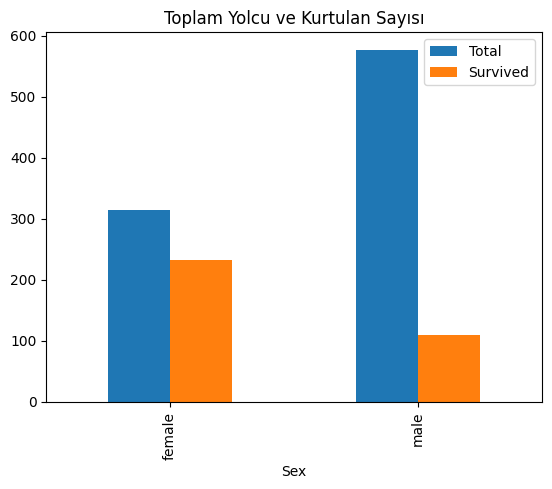

In [17]:
# Önce gruplayıp hem toplam sayıyı (count) hem de kurtulan toplamını (sum) alıyoruz
survivors_df = titanic_df.groupby('Sex').agg({'Survived': 'sum', 'PassengerId': 'count'})

# Sütun isimlerini düzeltelim ki anlaşılır olsun
survivors_df.rename(columns={'PassengerId': 'Total'}, inplace=True)

# Şimdi bu tabloyu çizelim
survivors_df[['Total', 'Survived']].plot(kind='bar', title='Toplam Yolcu ve Kurtulan Sayısı')
plt.show()

## Children

Önceki analiz yaşları dikkate almıyordu. Bir çocuğu bir yetişkinden ayırmak ve bunun hayatta kalma oranlarını *survival rates* nasıl etkilediğini görmek istiyoruz.

❓ Boolean indexing kullanarak yalnızca çocuk yolcuların satırlarını içeren bir `children_df` oluştur.

In [18]:
# Yaşı 18'den küçük olanları seçip yeni bir listeye atıyoruz
children_df = titanic_df[titanic_df['Age'] < 18]

# Listemizin ilk 5 satırına bakalım
children_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q


❓ Titanic’te kaç çocuk vardı?

In [19]:
# Listenin uzunluğunu (satır sayısını) yazdır
print(f"Titanic'teki çocuk sayısı: {len(children_df)}")

Titanic'teki çocuk sayısı: 113


❓Kaç çocuk hayatta kaldı?

In [20]:
# Hayatta kalan çocuk sayısını hesapla
surviving_children = children_df['Survived'].sum()

print(f"Hayatta kalan çocuk sayısı: {surviving_children}")

Hayatta kalan çocuk sayısı: 61


❓ Her kategori için( `male`, `female`, `children`).hayatta kalanlar / toplam oranını gösteren bir bar chart plot et. Unutma: `male` istatistiklerinden erkek çocukları, `female` istatistiklerinden ise kız çocukları çıkarman **substract** gerekiyor.

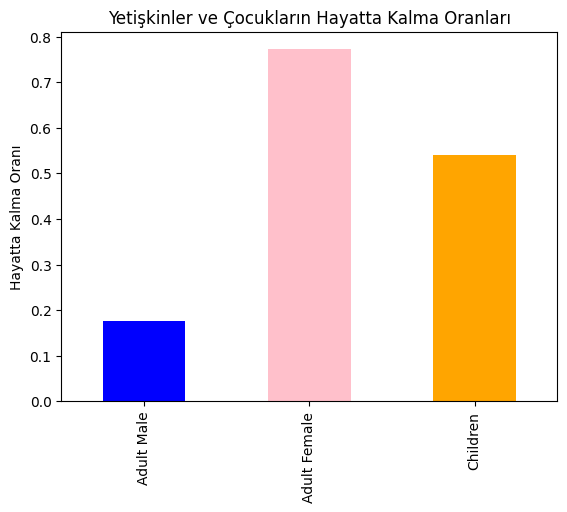

In [21]:
# 1. Çocukların hayatta kalma oranı (Zaten elimizde var)
child_rate = children_df['Survived'].mean()

# 2. Yetişkin Kadınların (18+) hayatta kalma oranı
# (Kadın OLSUN "VE" Yaşı 18'den büyük OLSUN)
adult_female_rate = titanic_df[(titanic_df['Sex'] == 'female') & (titanic_df['Age'] >= 18)]['Survived'].mean()

# 3. Yetişkin Erkeklerin (18+) hayatta kalma oranı
# (Erkek OLSUN "VE" Yaşı 18'den büyük OLSUN)
adult_male_rate = titanic_df[(titanic_df['Sex'] == 'male') & (titanic_df['Age'] >= 18)]['Survived'].mean()

# Bu oranları birleştirip grafiğe dökelim
survival_rates = pd.Series(
    [adult_male_rate, adult_female_rate, child_rate], 
    index=['Adult Male', 'Adult Female', 'Children']
)

# Grafiği çiz (Renkler: Mavi, Pembe, Turuncu)
survival_rates.plot(kind='bar', color=['blue', 'pink', 'orange'], title='Yetişkinler ve Çocukların Hayatta Kalma Oranları')
plt.ylabel('Hayatta Kalma Oranı')
plt.show()

## [Opsiyonal] Big families

❓ Daha büyük ailelerin hayatta kalması daha mı zordu?

Burada, yolcunun aile büyüklüğünü gösteren yeni bir sütunu `DataFrame` ine ekleyeceksin.
  

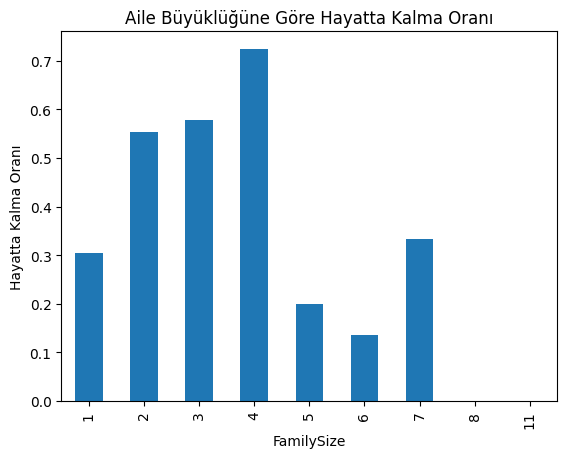

In [22]:
# Yeni bir 'FamilySize' sütunu oluşturuyoruz
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

# Aile büyüklüğüne göre hayatta kalma oranını çiziyoruz
titanic_df.groupby('FamilySize')['Survived'].mean().plot(kind='bar', title='Aile Büyüklüğüne Göre Hayatta Kalma Oranı')
plt.ylabel('Hayatta Kalma Oranı')
plt.show()

## [Opsiyonal] Distinguished titles

❓ Tahliye sırasında ünvanı (Mr, Mrs, Dr vb.) olan yolculara daha fazla öncelik verildi mi?

Bunu incelemek için, bazı string manipülasyonları yaparak her yolcu için ünvanını içeren yeni bir sütun oluştur.

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64


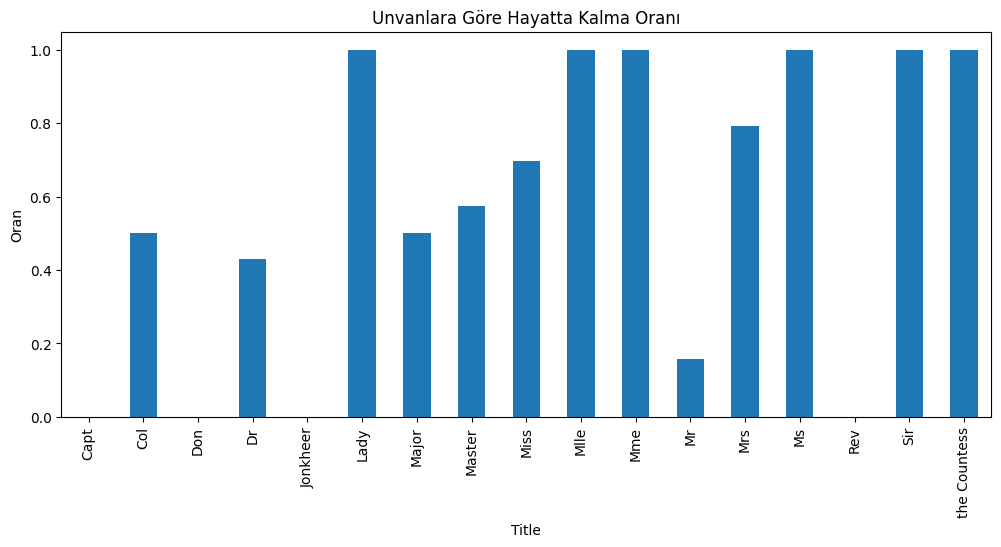

In [23]:
# Her ismin içindeki unvanı (noktadan önceki kelimeyi) çekip 'Title' sütununa atıyoruz
titanic_df['Title'] = titanic_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Hangi unvanlardan kaçar tane var?
print(titanic_df['Title'].value_counts())

# Şimdi bu unvanlara göre hayatta kalma oranını çizelim (Grafik biraz geniş olsun diye figsize veriyoruz)
titanic_df.groupby('Title')['Survived'].mean().plot(kind='bar', figsize=(12, 5), title='Unvanlara Göre Hayatta Kalma Oranı')
plt.ylabel('Oran')
plt.show()